# テクニックのカテゴライズ

In [45]:
import pandas as pd
from pathlib import Path

from geopy.geocoders import Nominatim
import numpy as np
from fasttext import load_model
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from ptitprince import RainCloud

from tqdm import tqdm
tqdm.pandas()

In [46]:
DATA_DIR = Path("/home/knikaido/work/atma10/data/")

In [47]:
train = pd.read_csv(DATA_DIR / 'train.csv')
train['log_likes'] = np.log10(train['likes'] + 1)
test = pd.read_csv(DATA_DIR / 'test.csv')
whole_df = pd.concat([train, test]).reset_index(drop=True)

In [48]:
tech = pd.read_csv(DATA_DIR / 'technique.csv')
tech['name'].value_counts()

etching                          5936
engraving                        5563
albumen print                    5544
gelatin silver print             1158
letterpress printing              722
drypoint                          229
salted paper print                221
slide                             203
painting                          184
steel engraving                   161
collotype                         103
ambrotype                          74
inkjet print                       68
colour woodcut                     53
brush                              48
cyanotype                          43
pen                                34
gelatin silver slide on glass      26
carbon print                       25
ferrotyping                        24
photolithography                   12
gilding                            11
counterproof                       10
writing (processes)                 9
lacquering                          8
printing                            4
printed matt

etching                          同伴が
engraving                        彫刻
albumen print                    けいらんし 写真のプリント技法
gelatin silver print             銀塩写真
letterpress printing              活版印刷
drypoint                          ドライポイントとは版画の技法のひとつ
salted paper print                塩使った印刷手法
slide                             写真っぽい
painting                          絵
steel engraving                   鉄彫刻
collotype                         写真製版
ambrotype                          これも写真
inkjet print                       インクジェット
colour woodcut                     木版画
brush                              ブラシ(絵の書き方)
cyanotype                          青写真
pen                                ペン(絵の書き方)
gelatin silver slide on glass      写真
carbon print                       写真っぽい
ferrotyping                        鉄板写真
photolithography                   石版刷等の版画
gilding                            額縁に金箔を施す装飾技術
counterproof                       銅版印刷．版画っぽい
writing (processes)                 9
lacquering                          溶剤を揮発させる．絵かな？
printing                            写真？
printed matter                      印刷物
oil transfer print                  写真
Valenciennes lace                   レース
cutting                             切る
perforating                         切る
litho etching                       印刷

In [49]:
train = pd.merge(train, tech, how='left', on='object_id')
train

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,...,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,log_likes,name
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48,1.690196,NaN
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,...,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2,0.477121,salted paper print
2,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,...,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2,0.477121,albumen print
3,0017be8caa87206532cb,4c406890d208fe01f8fb,Portret van een vrouw,"Portret van eenvrouw, zittend naast een tafel.","Portret van een vrouw, Tresling & Comp., 1860 ...",Tresling & Comp.,Tresling & Comp.,h 87mm × w 56mm,NaN,Portret van een vrouw,...,2007-01-01T00:00:00,"Gift of M.M. Boom, Leiden",1860 - 1880,1860.0,19,1860.0,1880.0,5,0.778151,albumen print
4,00181d86ff1a7b95864e,fa0891535500a4973db2,A St Bernard Dog,"Een sint-bernardshond, staand in een landschap...","A St Bernard Dog, Bernard te Gempt, c. 1850 - ...",Bernard te Gempt,Bernard te Gempt,h 179cm × w 248cm × t 4cm,NaN,A St Bernard Dog,...,1881-01-01T00:00:00,"J. Hilman Bequest, Amsterdam",c. 1850 - c. 1879,1850.0,19,1850.0,1879.0,100,2.004321,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,ffefbe1faf771aa4f790,e79c2e74ed17533a7e56,Storm op het IJ aan het Blauwhoofd van Amsterd...,Zeilschepen in de problemen op het IJ ter hoog...,Storm op het IJ aan het Blauwhoofd van Amsterd...,Noach van der Meer (II),Noach van der Meer (II),h 217mm × w 306mm,NaN,Storm op het IJ aan het Blauwhoofd van Amsterd...,...,1887-01-01T00:00:00,NaN,1778,1778.0,18,1778.0,1778.0,0,0.000000,engraving
13596,ffefbe1faf771aa4f790,e79c2e74ed17533a7e56,Storm op het IJ aan het Blauwhoofd van Amsterd...,Zeilschepen in de problemen op het IJ ter hoog...,Storm op het IJ aan het Blauwhoofd van Amsterd...,Noach van der Meer (II),Noach van der Meer (II),h 217mm × w 306mm,NaN,Storm op het IJ aan het Blauwhoofd van Amsterd...,...,1887-01-01T00:00:00,NaN,1778,1778.0,18,1778.0,1778.0,0,0.000000,etching
13597,fff08e76cbb969eaddc7,510358b74c1104edbbbd,"Het rad van fortuin, ca. 1689","Het rad van fortuin, ca. 1689. Spotprent op de...","Het rad van fortuin, ca. 1689, Romeyn de Hoogh...",Romeyn de Hooghe,Romeyn de Hooghe,h 560mm × w 405mm,NaN,"Het rad van fortuin, ca. 1689 'T Hedendaags Ra...",...,1881-01-01T00:00:00,NaN,1689 - 1690,1689.0,17,1689.0,1690.0,14,1.176091,letterpress printing
13598,fff08e76cbb969eaddc7,510358b74c1104edbbbd,"Het rad van fortuin, ca. 1689","Het rad van fortuin, ca. 1689. Spotprent op de...","Het rad van fortuin, ca. 1689, Romeyn de Hoogh...",Romeyn de Hooghe,Romeyn de Hooghe,h 560mm × w 405mm,NaN,"Het rad van fortuin, ca. 1689 'T Hedendaags Ra...",...,1881-01-01T00:00:00,NaN,1689 - 1690,1689.0,17,1689.0,1690.0,14,1.176091,etching


In [63]:
train_tech = train[train['name']=='writing (processes)']
train_tech.reset_index(inplace=True, drop=True)
train_tech.sort_values('likes')

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,...,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,log_likes,name
0,375c7e78baa38f0cf2c1,66c92025ac13e95f4063,Portret van C.J. baron Krayenhoff,"Zwart-wit fotoportret, kop en schouders van C....","Portret van C.J. baron Krayenhoff, A. Böeseken...",A. Böeseken,A. Böeseken,l 9.9cm × w 6.2cm,NaN,Portret van C.J. baron Krayenhoff,...,1895-01-01T00:00:00,"Gift of J.E.A.R., Baron Krayenhoff",1864,1864.0,19,1864.0,1864.0,0,0.00000,writing (processes)
3,de008abb07ecdf4e1b4b,ede5a8de2cf3fb6b5fe8,Koninklijk Postkantoor - Amsterdam,NaN,"Koninklijk Postkantoor - Amsterdam, Nicolaas J...",Nicolaas Jan Boon,Nicolaas Jan Boon,h 140mm × w 92mm,NaN,Koninklijk Postkantoor - Amsterdam,...,1994-01-01T00:00:00,NaN,1899,1899.0,19,1899.0,1899.0,0,0.00000,writing (processes)
4,dedaa9e885b413b6fa51,121f2815560420135577,Oproerkraaiers op de Dam tijdens het Aanspreke...,Menigte woedende burgers voor het Stadhuis op ...,Oproerkraaiers op de Dam tijdens het Aanspreke...,anonymous,anonymous,h 131mm × w 143mm,NaN,Oproerkraaiers op de Dam tijdens het Aanspreke...,...,1881-01-01T00:00:00,NaN,1696,1696.0,17,1696.0,1696.0,0,0.00000,writing (processes)
1,7125351b3147619f1274,c29e012cb997ad19a028,Zandvoort strand,NaN,"Zandvoort strand, Trenkler & Co., 1906",Trenkler & Co.,Trenkler & Co.,h 87mm × w 138mm,NaN,Zandvoort strand,...,1994-01-01T00:00:00,NaN,1906,1906.0,20,1906.0,1906.0,3,0.60206,writing (processes)
2,d7a0769c8c1c9a7a2076,d41af21546e15525ef1e,Stadsbestuur van Utrecht biedt Lodewijk XIV de...,Het stadsbestuur van Utrecht overhandigt op 5 ...,Stadsbestuur van Utrecht biedt Lodewijk XIV de...,Romeyn de Hooghe,Romeyn de Hooghe,h 316mm × w 260mm,NaN,Stadsbestuur van Utrecht biedt Lodewijk XIV de...,...,1881-01-01T00:00:00,NaN,1672 - 1674,1672.0,17,1672.0,1674.0,3,0.60206,writing (processes)


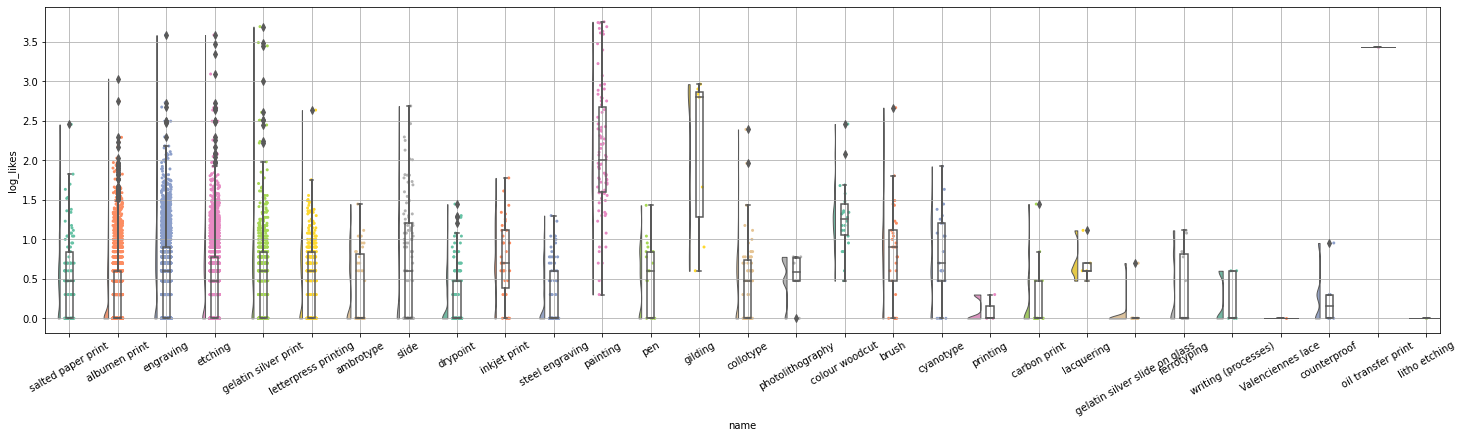

In [26]:
fig, ax = plt.subplots(figsize=(25, 6))
RainCloud(data=train, y='log_likes', x='name', ax=ax)
plt.xticks(rotation=30)
ax.grid()

In [43]:
mate = pd.read_csv(DATA_DIR / 'material.csv')
mate_large = mate['name'].value_counts()[mate['name'].value_counts() > 0]
mate_large = list(mate_large.index)
mate_large

['paper',
 'photographic paper',
 'oil paint (paint)',
 'cardboard',
 'canvas',
 'panel',
 'glass',
 'copper (metal)',
 'baryta paper',
 'velvet (fabric weave)',
 'metal',
 'leather',
 'wood (plant material)',
 'celluloid (cellulosic)',
 'RC paper',
 'pencil',
 'ink',
 'linen (material)',
 'tempera',
 'watercolor (paint)',
 'silk',
 'chalk',
 'oak (wood)',
 'deck paint',
 'hardboard',
 'printing ink',
 'paint (coating)',
 'gilding (material)',
 'particle board',
 'wax',
 'gouache (paint)',
 'plush',
 'Japanese paper (handmade paper)',
 'brass (alloy)',
 'ivory',
 'tin (metal)',
 'cotton (textile)',
 'silver (metal)',
 'mother of pearl',
 'textile materials',
 'gold (metal)',
 'amalgam',
 'parchment (animal material)',
 'lead (metal)',
 'alloy',
 'mahogany (wood)',
 'lacquer (coating)',
 'bronze (metal)',
 'iron (metal)',
 'tracing paper',
 'casein paint',
 'papier mâché',
 'asbestos',
 'asbestos-cement',
 'rope',
 'transparant paper',
 'tin alloy',
 'linden',
 'looking glasses',
 'popl

In [36]:
train = pd.merge(train, mate, how='left', on='object_id')
train

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,...,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,log_likes,name_x,name_y,name
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,1660 - 1685,1660.0,17,1660.0,1685.0,48,1.690196,NaN,oil paint (paint),oil paint (paint)
1,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,1660 - 1685,1660.0,17,1660.0,1685.0,48,1.690196,NaN,oil paint (paint),canvas
2,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,1660 - 1685,1660.0,17,1660.0,1685.0,48,1.690196,NaN,canvas,oil paint (paint)
3,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,1660 - 1685,1660.0,17,1660.0,1685.0,48,1.690196,NaN,canvas,canvas
4,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,...,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2,0.477121,salted paper print,photographic paper,photographic paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33801,fff08e76cbb969eaddc7,510358b74c1104edbbbd,"Het rad van fortuin, ca. 1689","Het rad van fortuin, ca. 1689. Spotprent op de...","Het rad van fortuin, ca. 1689, Romeyn de Hoogh...",Romeyn de Hooghe,Romeyn de Hooghe,h 560mm × w 405mm,NaN,"Het rad van fortuin, ca. 1689 'T Hedendaags Ra...",...,1689 - 1690,1689.0,17,1689.0,1690.0,14,1.176091,etching,paper,paper
33802,fff1d87d79953ddab2c6,b5b9203624d1f0db99a9,The Adoration of the Shepherds,De aanbidding der herders. Maria knielt achter...,"The Adoration of the Shepherds, Bartolommeo Su...",Bartolommeo Suardi,Bartolommeo Suardi,h 50.5cm × w 43.5cm × d 14cm,NaN,The Adoration of the Shepherds,...,1500 - 1535,1500.0,15,1500.0,1535.0,171,2.235528,NaN,oil paint (paint),oil paint (paint)
33803,fff1d87d79953ddab2c6,b5b9203624d1f0db99a9,The Adoration of the Shepherds,De aanbidding der herders. Maria knielt achter...,"The Adoration of the Shepherds, Bartolommeo Su...",Bartolommeo Suardi,Bartolommeo Suardi,h 50.5cm × w 43.5cm × d 14cm,NaN,The Adoration of the Shepherds,...,1500 - 1535,1500.0,15,1500.0,1535.0,171,2.235528,NaN,oil paint (paint),panel
33804,fff1d87d79953ddab2c6,b5b9203624d1f0db99a9,The Adoration of the Shepherds,De aanbidding der herders. Maria knielt achter...,"The Adoration of the Shepherds, Bartolommeo Su...",Bartolommeo Suardi,Bartolommeo Suardi,h 50.5cm × w 43.5cm × d 14cm,NaN,The Adoration of the Shepherds,...,1500 - 1535,1500.0,15,1500.0,1535.0,171,2.235528,NaN,panel,oil paint (paint)


In [40]:
train_mate = train[train['name_y'].isin(mate_large)]
train_mate.reset_index(inplace=True, drop=True)

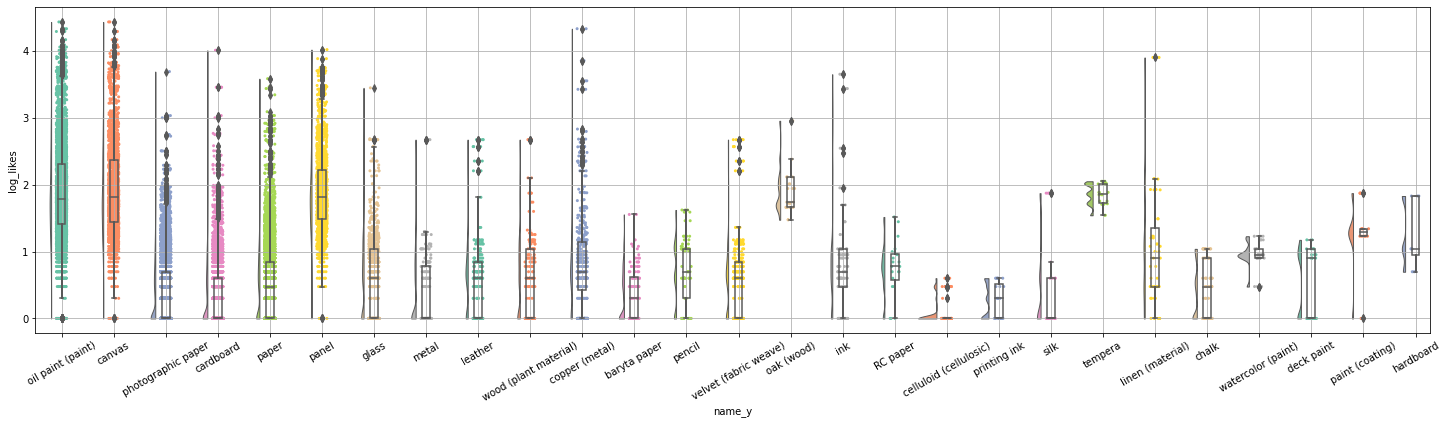

In [41]:
fig, ax = plt.subplots(figsize=(25, 6))
RainCloud(data=train_mate, y='log_likes', x='name_y', ax=ax)
plt.xticks(rotation=30)
ax.grid()